# INDENG 240 Case Study
## Group Members
- Yunqi Liang, SID: 3039669648
- Xinyu Hou, SID: 3039669882
- Jiayi Fang, SID: 3039670935
- Xilin Tian, SID: 3039682596

In [1]:
pip install gurobipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gurobipy as gp
from gurobipy import GRB

In [3]:
m = gp.Model("CaseStudy2")

# Create Variables
x1 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x1") # Grand Estates-The Trump-On the lake
x2 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x2") # Grand Estates-The Trump-Not on the lake
x3 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x3") # Grand Estates-The Vanderbilt-On the lake
x4 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x4") # Grand Estates-The Vanderbilt-Not on the lake
x5 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x5") # Grand Estates-The Hughes-On the lake
x6 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x6") # Grand Estates-The Hughes-Not on the lake
x7 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x7") # Grand Estates-The Jackson-On the lake
x8 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x8") # Grand Estates-The Jackson-Not on the lake

x9 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x9") # Glen Wood Collection-Grand Cypress-On Premium
x10 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x10") # Glen Wood Collection-Grand Cypress-Standarded
x11 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x11") # Glen Wood Collection-Lazy Oak
x12 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x12") # Glen Wood Collection-Wind Row
x13 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x13") # Glen Wood Collection-Orangewood

x14 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x14") # Lakeview Patio Homes-Bayview-On Premium
x15 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x15") # Lakeview Patio Homes-Bayview-Standarded
x16 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x16") # Lakeview Patio Homes-Storeline
x17 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x17") # Lakeview Patio Homes-Docks Edge
x18 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x18") # Lakeview Patio Homes-Golden Pier

x19 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x19") # Country Condominiums-Country Stream
x20 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x20") # Country Condominiums-Weeping Willow
x21 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x21") # Country Condominiums-Picket Fence

Restricted license - for non-production use only - expires 2024-10-28


## Selling price for exclusive home will be an additional 30% plus 50,000 more than the models not on the lake

x1 700,000*1.3+50,000 = $960,000

x2 $700,000

x3 $934,000

x4 $680,000

x5 $895,000

x6 $650,000

x7 $817,000

x8 $590,000

## Built on “premium” will have higher selling price

x9 420,000+40,000 = $460,000

x10 $420,000

x11 $380,000

x12 $320,000

x13 $280,000


x14 300,000+30,000 = $330,000

x15 $300,000

x16 $270,000

x17 $240,000

x18 $200,000

x19 $220,000

x20 $160,000

x21 $140,000

In [4]:
# Set Objective
m.setObjective(0.22*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
               +0.18*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
               +0.2*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
               +0.25*(220000*x19+160000*x20+140000*x21), GRB.MAXIMIZE)

In [5]:
# Set Constrains
# Each of the Grand Estate series plans must have at least eight units on the lake
m.addConstr (x1>=8, "c0")
m.addConstr (x3>=8, "c1")
m.addConstr (x5>=8, "c2")
m.addConstr (x7>=8, "c3")

# 50 half-acre lots on the lake are to be used exclusively by the Grand Estate Series homes
m.addConstr (x1+x3+x5+x7==50, "c4")

# No more than 25% of the total Grand Cypress models and 25% of the total Bayview models may be built on the premium lots
m.addConstr (x9<=0.25*(x9+x10), "c5")
m.addConstr (x14<=0.25*(x14+x15), "c6")

#Each outside parking space will occupy 200 square feet of space
m.addConstr ((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200<=15*43560, "c7")

<gurobi.Constr *Awaiting Model Update*>

In [6]:
# Variety
m.addConstr((x18+x20+x21)<=0.25*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c8")
m.addConstr((x18+x20+x21)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c9")

m.addConstr((x7+x8+x12+x13+x16+x17+x19)>=0.25*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c10")
m.addConstr((x7+x8+x12+x13+x16+x17+x19)<=0.4*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c11")

m.addConstr((x3+x4+x5+x6+x9+x10+x11+x14+x15)>=0.25*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c12")
m.addConstr((x3+x4+x5+x6+x9+x10+x11+x14+x15)<=0.4*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c13")

m.addConstr((x1+x2)<=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c14")
m.addConstr((x1+x2)>=0.05*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c15")

# None of the four products is to make up more than 35% or less than 15% of the units built in the development
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c16")
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c17")

m.addConstr((x9+x10+x11+x12+x13)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c18")
m.addConstr((x9+x10+x11+x12+x13)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c19")

m.addConstr((x14+x15+x16+x17+x18)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c20")
m.addConstr((x14+x15+x16+x17+x18)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c21")

m.addConstr((x19+x20+x21)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c22")
m.addConstr((x19+x20+x21)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c23")

# Each plan must occupy between 20% and 35% of the total units of that products
m.addConstr((x1+x2)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c24")
m.addConstr((x1+x2)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c25")
m.addConstr((x3+x4)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c26")
m.addConstr((x3+x4)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c27")
m.addConstr((x5+x6)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c28")
m.addConstr((x5+x6)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c29")
m.addConstr((x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c30")
m.addConstr((x7+x8)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c31")

m.addConstr((x9+x10)<=0.35*(x9+x10+x11+x12+x13),"c32")
m.addConstr((x9+x10)>=0.2*(x9+x10+x11+x12+x13),"c33")
m.addConstr(x11<=0.35*(x9+x10+x11+x12+x13),"c34")
m.addConstr(x11>=0.2*(x9+x10+x11+x12+x13),"c35")
m.addConstr(x12<=0.35*(x9+x10+x11+x12+x13),"c36")
m.addConstr(x12>=0.2*(x9+x10+x11+x12+x13),"c37")
m.addConstr(x13<=0.35*(x9+x10+x11+x12+x13),"c38")
m.addConstr(x13>=0.2*(x9+x10+x11+x12+x13),"c39")

m.addConstr((x14+x15)<=0.35*(x14+x15+x16+x17+x18),"c40")
m.addConstr((x14+x15)>=0.2*(x14+x15+x16+x17+x18),"c41")
m.addConstr(x16<=0.35*(x14+x15+x16+x17+x18),"c42")
m.addConstr(x16>=0.2*(x14+x15+x16+x17+x18),"c43")
m.addConstr(x17<=0.35*(x14+x15+x16+x17+x18),"c44")
m.addConstr(x17>=0.2*(x14+x15+x16+x17+x18),"c45")
m.addConstr(x18<=0.35*(x14+x15+x16+x17+x18),"c46")
m.addConstr(x18>=0.2*(x14+x15+x16+x17+x18),"c47")

m.addConstr(x19<=0.35*(x19+x20+x21),"c48")
m.addConstr(x19>=0.2*(x19+x20+x21),"c49")
m.addConstr(x20<=0.35*(x19+x20+x21),"c50")
m.addConstr(x20>=0.2*(x19+x20+x21),"c51")
m.addConstr(x21<=0.35*(x19+x20+x21),"c52")
m.addConstr(x21>=0.2*(x19+x20+x21),"c53")

# No more than 70% of the single-family homes (all homes except the Country Condominiums) may be two-story homes
m.addConstr((x1+x2+x3+x4+x9+x10+x11+x12+x14+x15+x16)<=0.7*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18),"c54")

# Affordable Housing
m.addConstr((x18+x20+x21)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c55")

<gurobi.Constr *Awaiting Model Update*>

In [7]:
# Lotsize + Outside Parking + Road/Greenbelts <= 300 Acres
# Lotsize = Sum up half,1/4,1/6,1/10, and all others
# Lotsize = Ground + Yard + Garage
# Outside Parking = (2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200
# Road/Greenbelts = (x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000
m.addConstr(0.5*43560*(x1+x2+x3+x4+x5+x6+x7+x8)
            +0.25*43560*x9
            +4950*x10
            +0.1*43560*(x11+x12+x13+x15+x16+x17+x18)
            +(43560/6)*x14
            +1500*(x19+x20+x21)
            +((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200)
            +((x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000)<=(300*43560),"c56")

<gurobi.Constr *Awaiting Model Update*>

In [8]:
m.optimize() # Appendix 1

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print ('obj:%g' % m.ObjVal)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 57 rows, 21 columns and 588 nonzeros
Model fingerprint: 0x4f86c312
Coefficient statistics:
  Matrix range     [5e-02, 2e+04]
  Objective range  [4e+04, 2e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 1e+07]
Presolve removed 5 rows and 0 columns
Presolve time: 0.00s
Presolved: 52 rows, 21 columns, 563 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4888752e+09   1.095723e+06   0.000000e+00      0s
      25    1.2260933e+08   0.000000e+00   0.000000e+00      0s

Solved in 25 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.226093338e+08
x1 26
x2 66.62
x3 8
x4 58.1571
x5 8
x6 44.9257
x7 8
x8 44.9257
x9 0
x10 216.113
x11 154.367
x12 123.493
x13 123.493
x14 0
x15 102.911
x16 

In [9]:
scientific_notation = 1.22609e+08
decimal_representation = int(scientific_notation)
print(decimal_representation)

122609000


In [10]:
print('\nVariable Sensitivity Analysis:') # Appendix 2
print('Name\tReduced Cost\tMin Obj Coef\tMax Obj Coef')
for v in m.getVars():
    print(f"{v.VarName}\t{round(v.RC, 2)}\t\t{round(v.SAObjLow, 2)}\t\t{round(v.SAObjUp, 2)}")


print('\nSensitivity Analysis:')
print('Name\t\tShadow Price\tSlack\tMin RHS\tMax RHS')
for c in m.getConstrs():
    print(f"{c.ConstrName}\t\t{round(c.Pi, 2)}\t\t{round(c.Slack, 2)}\t{round(c.SARHSLow, 2)}\t{round(c.SARHSUp, 2)}")


Variable Sensitivity Analysis:
Name	Reduced Cost	Min Obj Coef	Max Obj Coef
x1	0.0		209880.0		inf
x2	0.0		151430.52		155320.0
x3	0.0		-inf		206800.0
x4	0.0		149000.0		152163.24
x5	0.0		-inf		200200.0
x6	0.0		139700.0		143600.0
x7	0.0		-inf		187000.0
x8	0.0		122540.0		141756.15
x9	-47274.72		-inf		130074.72
x10	0.0		71989.78		851358.07
x11	0.0		59412.93		71970.08
x12	0.0		-21193.86		66548.92
x13	0.0		-28393.86		60546.66
x14	-20632.08		-inf		86632.08
x15	0.0		55827.59		93028.9
x16	0.0		48000.0		54600.0
x17	0.0		47400.0		54000.0
x18	0.0		-123914.24		67896.32
x19	0.0		27355.4		632982.99
x20	0.0		35000.0		617982.99
x21	0.0		-9855.82		40000.0

Sensitivity Analysis:
Name		Shadow Price	Slack	Min RHS	Max RHS
c0		0.0		-18.0	-inf	26.0
c1		-1320.0		0.0	-0.0	26.0
c2		-3300.0		0.0	-0.0	26.0
c3		-7260.0		0.0	-0.0	26.0
c4		57200.0		0.0	32.0	116.62
c5		0.0		54.03	-54.03	inf
c6		0.0		25.73	-25.73	inf
c7		0.0		94151.74	559248.26	inf
c8		33424.19		0.0	-26.15	13.31
c9		0.0		-176.42	-inf	176.42
c10		0.0		-1

---
## Report: Formulation
### Variables:
#### Product :  Grand Estate Series    
${X_1}$ be the number of units On the lake in The Trump plan; ${X_2}$ be the number of units Not on the lake in The Trump plan;    
${X_3}$ be the number of units On the lake in The Vanderbilt plan; ${X_4}$ be the number of units Not on the lake in The Vanderbilt plan;    
${X_5}$ be the number of units On the lake in The Hughes plan; ${X_6}$ be the number of units Not on the lake in The Hughes plan;    
${X_7}$ be the number of units On the lake in The Jackson plan; ${X_8}$ be the number of units Not on the lakein The Jackson plan;
#### Product :  Glen Wood Collection
${X_9}$ be the number of units in Grand Cypress plan built on “premium” quarter-acre lots;    
${X_{10}}$ be the number of units in Grand Cypress plan built on standard lots;    
${X_{11}}$ be the number of units in Lazy Oak plan;    
${X_{12}}$ be the number of units in Wind Row plan;    
${X_{13}}$ be the number of units in Orangewood plan;    
#### Product :   Lakeview Patio Homes
${X_{14}}$ be the number of units in Bayview plan built on “premium” one-sixth acre lots;    
${X_{15}}$ be the number of units in Bayview plan built on standard lots;    
${X_{16}}$ be the number of units in Storeline plan;    
${X_{17}}$ be the number of units in Docks Edge plan;    
${X_{18}}$ be the number of units in Golden Pier plan;
#### Product :    Country Condominiums
${X_{19}}$ be the number of units in Country Stream plan;    
${X_{20}}$ be the number of units in Weeping Willow plan;    
${X_{21}}$ be the number of units in Picket Fence plan;    
### Objective Function: 
#### Maximize the net Profit, each percentage has determined in the pdf file

Max    
$0.22*(960000*x_1+700000*x_2+934000*x_3+680000*x_4+895000*x_5+650000*x_6+817000*x_7+590000*x_8) + $    
$0.18*(460000*x_9+420000*x_{10}+380000*x_{11}+320000*x_{12}+280000*x_{13}) + $    
$0.2*(330000*x_{14}+300000*x_{15}+270000*x_{16}+240000*x_{17}+200000*x_{18}) + $    
$0.25*(220000*x_{19}+160000*x_{20}+140000*x_{21})$

### Constrains
#### s.t.
Each of the Grand Estate series plans must have at least eight units on the lake:
\begin{cases}
X_1 \geq 8 & c_0\\
X_3 \geq 8 & c_1\\
X_5 \geq 8 & c_2\\
X_7 \geq 8 & c_3\\
\end{cases}

50 half-acre lots on the lake are to be used exclusively by the Grand Estate Series homes: $x1+x3+x5+x7==50 \implies c_4$

No more than 25% of the total Grand Cypress models and 25% of the total Bayview models may be built on the premium lots:
\begin{cases}
X_9 \leq 0.25*(x_9+x_{10}) & c_5\\
X_{14} \leq 0.25*(x_{14}+x_{15}) & c_6\\
\end{cases}

Each outside parking space will occupy 200 square feet of space:    
$ 200 *(2*(x_1+x_2+x_{11}+x_{14}+x_{15}+x_{20}+x_{21}) + 3*x_{19} +x_3+x_4+x_5+x_6+x_9+x_{10}+x_{12}+x_{13}+x_{16}+x_{17}) \leq 15*43560 \implies c_7 $

Variety:
\begin{cases}
x_{18}+x_{20}+x_{21} \leq 0.25* \sum_{i = 1}^{21} x_i & c_8 \implies \text{Tow-bedroom homes Maximum}\\
x_{18}+x_{20}+x_{21} \ge 0.15* \sum_{i = 1}^{21} x_i & c_9 \implies \text{Tow-bedroom homes Minimum}\\
x_7+x_8+x_{12}+x_{13}+x_{16}+x_{17}+x_{19} \leq 0.4* \sum_{i = 1}^{21} x_i & c_{11} \implies \text{Three-bedroom homes Maximum}\\
x_7+x_8+x_{12}+x_{13}+x_{16}+x_{17}+x_{19} \ge 0.25* \sum_{i = 1}^{21} x_i & c_{10} \implies \text{Three-bedroom homes Minimum}\\
x_3+x_4+x_5+x_6+x_9+x_{10}+x_{11}+x_{14}+x_{15} \leq 0.4* \sum_{i = 1}^{21} x_i & c_{13} \implies \text{Three-bedroom homes Maximum}\\
x_3+x_4+x_5+x_6+x_9+x_{10}+x_{11}+x_{14}+x_{15} \ge 0.25* \sum_{i = 1}^{21} x_i & c_{12} \implies \text{Three-bedroom homes Minimum}\\
x_1+x_2 \leq 0.15* \sum_{i = 1}^{21} x_i & c_{14} \implies \text{Five-bedroom homes Maximum}\\
x_1+x_2 \ge 0.05* \sum_{i = 1}^{21} x_i & c_{15} \implies \text{Five-bedroom homes Minimum}\\
\end{cases}

None of the four products is to make up more than 35% or less than 15% of the units built in the development:
\begin{cases}
\sum_{i = 1}^{8} x_i \leq 0.35 * \sum_{i = 1}^{21} x_i & c_{16}\\
\sum_{i = 1}^{8} x_i \geq 0.15 * \sum_{i = 1}^{21} x_i & c_{17}\\
\sum_{i = 9}^{13} x_i \leq 0.35 * \sum_{i = 1}^{21} x_i & c_{18}\\
\sum_{i = 9}^{13} x_i \geq 0.15 * \sum_{i = 1}^{21} x_i & c_{19}\\
\sum_{i = 14}^{18} x_i \leq 0.35 * \sum_{i = 1}^{21} x_i & c_{20}\\
\sum_{i = 14}^{18} x_i \geq 0.15 * \sum_{i = 1}^{21} x_i & c_{21}\\
\sum_{i = 19}^{21} x_i \leq 0.35 * \sum_{i = 1}^{21} x_i & c_{22}\\
\sum_{i = 19}^{21} x_i \geq 0.15 * \sum_{i = 1}^{21} x_i & c_{23}\\
\end{cases}

Each plan must occupy between 20% and 35% of the total units of that products:    
Product: Grand Estate Series
\begin{cases}
x_1+x_2 \leq 0.35 * \sum_{i = 1}^{8} x_i & c_{24}\\
x_1+x_2 \geq 0.2 * \sum_{i = 1}^{8} x_i & c_{25}\\
x_3+x_4 \leq 0.35 * \sum_{i = 1}^{8} x_i & c_{26}\\
x_3+x_4 \geq 0.2 * \sum_{i = 1}^{8} x_i & c_{27}\\
x_5+x_6 \leq 0.35 * \sum_{i = 1}^{8} x_i & c_{28}\\
x_5+x_6 \geq 0.2 * \sum_{i = 1}^{8} x_i & c_{29}\\
x_7+x_8 \leq 0.35 * \sum_{i = 1}^{8} x_i & c_{30}\\
x_7+x_8 \geq 0.2 * \sum_{i = 1}^{8} x_i & c_{31}\\
\end{cases}
Product: Glen Wood Collection
\begin{cases}
x_9+x_{10} \leq 0.35 * \sum_{i = 9}^{13} x_i & c_{32}\\
x_9+x_{10} \geq 0.2 * \sum_{i = 9}^{13} x_i & c_{33}\\
x_{11} \leq 0.35 * \sum_{i = 9}^{13} x_i & c_{34}\\
x_{11} \geq 0.2 * \sum_{i = 9}^{13} x_i & c_{35}\\
x_{12} \leq 0.35 * \sum_{i = 9}^{13} x_i & c_{36}\\
x_{12} \geq 0.2 * \sum_{i = 9}^{13} x_i & c_{37}\\
x_{13} \leq 0.35 * \sum_{i = 9}^{13} x_i & c_{38}\\
x_{13} \geq 0.2 * \sum_{i = 9}^{13} x_i & c_{39}\\
\end{cases}
Product:  Lakeview Patio Homes
\begin{cases}
x_{14}+x_{13} \leq 0.35 * \sum_{i = 14}^{18} x_i & c_{40}\\
x_{14}+x_{13} \geq 0.2 * \sum_{i = 14}^{18} x_i & c_{41}\\
x_{16} \leq 0.35 * \sum_{i = 14}^{18} x_i & c_{42}\\
x_{16} \geq 0.2 * \sum_{i = 14}^{18} x_i & c_{43}\\
x_{17} \leq 0.35 * \sum_{i = 14}^{18} x_i & c_{44}\\
x_{17} \geq 0.2 * \sum_{i = 14}^{18} x_i & c_{45}\\
x_{18} \leq 0.35 * \sum_{i = 14}^{18} x_i & c_{46}\\
x_{18} \geq 0.2 * \sum_{i = 14}^{18} x_i & c_{47}\\
\end{cases}
Product: Country Condominiums
\begin{cases}
x_{19} \leq 0.35 * \sum_{i = 19}^{21} x_i & c_{48}\\
x_{19} \geq 0.2 * \sum_{i = 19}^{21} x_i & c_{49}\\
x_{20} \leq 0.35 * \sum_{i = 19}^{21} x_i & c_{50}\\
x_{20} \geq 0.2 * \sum_{i = 19}^{21} x_i & c_{51}\\
x_{21} \leq 0.35 * \sum_{i = 19}^{21} x_i & c_{52}\\
x_{21} \geq 0.2 * \sum_{i = 19}^{21} x_i & c_{53}\\
\end{cases}

No more than 70% of the single-family homes (all homes except the Country Condominiums) may be two-story homes: 
$x_1+x_2+x_3+x_4+x_9+x_{10}+x_{11}+x_{12}+x_{14}+x_{15}+x_{16})\leq 0.7*\sum_{i = 1}^{18}X_i \implies c_{54} $

Affordable Housing:    
$(x_{18}+x_{20}+x_{21})>=0.15* \geq 0.15*\sum_{i = 1}^{21}X_i \implies c_{55}$

## Report: Solution
### For LP model
By using Groubi$^1$ to Optimize the Model, we have the solution of Maximize profit is built:

#### For Grand Estate Series products:
\begin{cases}
\text{26 units On the lake in The Trump plan;} & \text{ 66.62 units Not On the lake in The Trump plan;}\\
\text{8 units On the lake in The Vanderbilt plan;} & \text{ 58.1571 units Not On the lake in The Vanderbilt plan;}\\
\text{8 units On the lake in The Hughes plan;} & \text{ 44.9257 units Not On the lake in The Hughes plan;}\\
\text{8 units On the lake in The Jackson plan;} & \text{ 44.9257 units Not On the lake in The Jackson plan.}\\
\end{cases}
#### For Glen Wood Collection products:
\begin{cases}
\text{0 units in Grand Cypress plan built on “premium” quarter-acre lots;} & \text{ 216.113 units in Grand Cypress plan built on standard lots;}\\
\text{154.367 units in Lazy Oak plan;}\\
\text{123.493 units in Wind Row plan;}\\
\text{123.493 units in Orangewood plan.}\\
\end{cases}
#### For Lakeview Patio Homes products:
\begin{cases}
\text{0 units in Bayview plan built on “premium” one-sixth acre lots;} & \text{ 102.911 units in Bayview plan built on standard lots;}\\
\text{67.6273 units in Storeline plan;}\\
\text{64.687 units in Docks Edge plan;}\\
\text{58.8063 units in Golden Pier plan.}\\
\end{cases}
#### For Country Condominiums products:
\begin{cases}
\text{205.822 units in Country Stream plan;}\\
\text{205.822 units in Weeping Willow plan;}\\
\text{176.419 units in Picket Fence plan.}\\
\end{cases}

Under this condition, we can say that the maximize net profits for LSDC is 1.22609e+08 = $122609000

$^1: $ Appendix 1 in Kernel[8].

## Report: Analysis
From the above sensitivity analysis$^2$, we can see that all the decision variables are basic except $x_9$ and $x_{14}$, since the optimal solution for $x_9 = x_{14} = 0$ and the reduced cost $x_9 = -47274.72, x_{14} = -20632.08$. Which means This decision variable will be non-zero if its objective function coefficient is decreased by its reduced cost.

Shadow Price is the Change of the objective function from one unit increase in its right-hand side $b_i$. In this Model,Constraint $c_0$, $c_5$ to $c_7$, $c_9$ to $c_{16}$, $c_{19}$ to $c_{23}$, $c_{25}$ to $c_{28}$, $c_{30}$, $c_{33}$ to $c_{36}$, $c_{38}$, $c_{41}$ to $c_{46}$, $c_{49}$, $c_{51}$ to $c_{53}$ and $c_{55}$, are not binding since $y_i$ = 0 for corresponding i; Also, Constraint $c_1 = -1320$, $c_2 = -3300$, $c_3 = -7260$, $c_4 = 57200$, $c_8 = 33424.19$, $c_{17} = -59347.66$, $c_{18} = 16454.81$, $c_{24} = 2565.83$, $c_{29} = -600$, $c_{31} = -11965.83$, $c_{32} = 3586.69$, $c_{37} = -8965.83$, $c_{39} = -10165.83$, $c_{40} = 4165.83$, $c_{47} = -39590.02$, $c_{48} = 51590.02$, $c_{50} = 5000$, $c_{54} = 6000.0$ and $c_{56} = 9.17$ are binding since the slack $s_i$ = 0 for corresponding i where reduced cost is the dual slack; 

$^2$: Appendix 2 in Kernel[10].
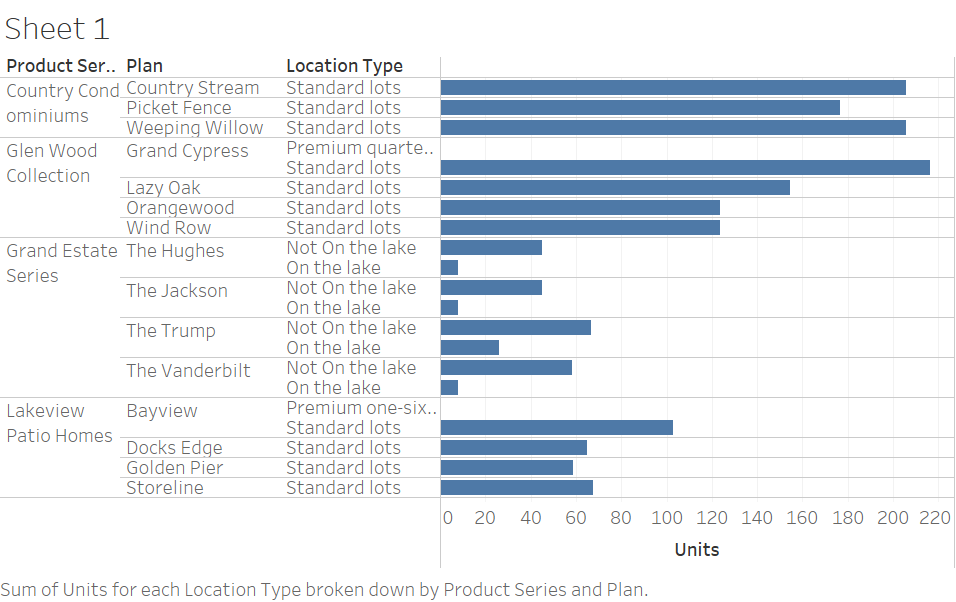
- The fact that $x_9$ and $x_{14}$ have a solution value of zero and negative reduced costs indicates that they are currently not in the solution (non-basic variables). However, if the cost associated with these decision variables decreases by at least their reduced costs (i.e., 47274.72 for $x_9$ and 20632.08 for $x_{14}$), they could become positive and enter the basis. This suggests that there is potential to include these variables in the solution if the conditions (costs) become more favorable.
- For constraints $c_1$, $c_2$, $c_3$, and $c_4$, the negative and positive shadow prices suggest that relaxing or tightening these constraints will have a substantial impact on the objective function. For instance, constraint $c_4$ has a large positive shadow price, indicating that an additional unit of whatever resource or condition $c_4$ represents could significantly increase profit.


# Modified Problem Statement

In [11]:
# Luxury Tax for Country Condominiums

import pandas as pd
import numpy as np

xA_value = (x1+x2+x3+x4+x5+x6+x7+x8).getValue()
xB_value = (x9+x10+x11+x12+x13).getValue()
xC_value = (x14+x15+x16+x17+x18).getValue()
xD_value = (x19+x20+x21).getValue()
# Create a dictionary to map variable names to their values
variable_values = {
    'xA': xA_value,
    'xB': xB_value,
    'xC': xC_value,
    'xD': xD_value
}

# Sort the variables by their values in descending order
sorted_variables = sorted(variable_values.items(), key=lambda item: item[1], reverse=True)

# Find the position 'i' of xD in the sorted list
i = [variable[0] for variable in sorted_variables].index('xD') + 1

# Print the position 'i'
print(f"The position 'i' of Country Condominiums units sold is: {i}")

The position 'i' of Country Condominiums units sold is: 2


In [12]:
m = gp.Model("CaseStudy2-Modified")

# Create Variables
x1 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x1") # Grand Estates-The Trump-On the lake
x2 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x2") # Grand Estates-The Trump-Not on the lake
x3 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x3") # Grand Estates-The Vanderbilt-On the lake
x4 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x4") # Grand Estates-The Vanderbilt-Not on the lake
x5 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x5") # Grand Estates-The Hughes-On the lake
x6 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x6") # Grand Estates-The Hughes-Not on the lake
x7 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x7") # Grand Estates-The Jackson-On the lake
x8 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x8") # Grand Estates-The Jackson-Not on the lake

x9 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x9") # Glen Wood Collection-Grand Cypress-On Premium
x10 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x10") # Glen Wood Collection-Grand Cypress-Standarded
x11 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x11") # Glen Wood Collection-Lazy Oak
x12 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x12") # Glen Wood Collection-Wind Row
x13 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x13") # Glen Wood Collection-Orangewood

x14 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x14") # Lakeview Patio Homes-Bayview-On Premium
x15 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x15") # Lakeview Patio Homes-Bayview-Standarded
x16 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x16") # Lakeview Patio Homes-Storeline
x17 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x17") # Lakeview Patio Homes-Docks Edge
x18 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x18") # Lakeview Patio Homes-Golden Pier

x19 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x19") # Country Condominiums-Country Stream
x20 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x20") # Country Condominiums-Weeping Willow
x21 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x21") # Country Condominiums-Picket Fence

In [13]:
# Set Constrains
# Modified 3: At least three of the Grand Estate series plan must have at least eight units on the lake.
x1_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x1_1") # Grand Estates-The Trump-On the lake-Whether>=8
x3_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x3_1") # Grand Estates-The Vanderbilt-On the lake-Whether>=8
x5_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x5_1") # Grand Estates-The Hughes-On the lake-Whether>=8
x7_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x7_1") # Grand Estates-The Jackson-On the lake-Whether>=8

m.addConstr (x1_1+x3_1+x5_1+x7_1>=3, "c0_1")

m.addConstr (x1>=8*x1_1, "c0")
m.addConstr (x3>=8*x3_1, "c1")
m.addConstr (x5>=8*x5_1, "c2")
m.addConstr (x7>=8*x7_1, "c3")

# 50 half-acre lots on the lake are to be used exclusively by the Grand Estate Series homes
m.addConstr (x1+x3+x5+x7==50, "c4")

# No more than 25% of the total Grand Cypress models and 25% of the total Bayview models may be built on the premium lots
m.addConstr (x9<=0.25*(x9+x10), "c5")
m.addConstr (x14<=0.25*(x14+x15), "c6")

#Each outside parking space will occupy 200 square feet of space
m.addConstr ((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200<=15*43560, "c7")

<gurobi.Constr *Awaiting Model Update*>

In [14]:
# Modified 1: Ignore the table of the Max and Min percentage
#Other Varieties:
# None of the four products is to make up more than 35% or less than 15% of the units built in the development
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c8")
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c9")

m.addConstr((x9+x10+x11+x12+x13)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c10")
m.addConstr((x9+x10+x11+x12+x13)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c11")

m.addConstr((x14+x15+x16+x17+x18)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c12")
m.addConstr((x14+x15+x16+x17+x18)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c13")

m.addConstr((x19+x20+x21)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c14")
m.addConstr((x19+x20+x21)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c15")

# Each plan must occupy between 20% and 35% of the total units of that products
m.addConstr((x1+x2)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c16")
m.addConstr((x1+x2)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c17")
m.addConstr((x3+x4)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c18")
m.addConstr((x3+x4)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c19")
m.addConstr((x5+x6)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c20")
m.addConstr((x5+x6)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c21")
m.addConstr((x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c22")
m.addConstr((x7+x8)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c23")

m.addConstr((x9+x10)<=0.35*(x9+x10+x11+x12+x13),"c24")
m.addConstr((x9+x10)>=0.2*(x9+x10+x11+x12+x13),"c25")
m.addConstr(x11<=0.35*(x9+x10+x11+x12+x13),"c26")
m.addConstr(x11>=0.2*(x9+x10+x11+x12+x13),"c27")
m.addConstr(x12<=0.35*(x9+x10+x11+x12+x13),"c28")
m.addConstr(x12>=0.2*(x9+x10+x11+x12+x13),"c29")
m.addConstr(x13<=0.35*(x9+x10+x11+x12+x13),"c30")
m.addConstr(x13>=0.2*(x9+x10+x11+x12+x13),"c31")

m.addConstr((x14+x15)<=0.35*(x14+x15+x16+x17+x18),"c32")
m.addConstr((x14+x15)>=0.2*(x14+x15+x16+x17+x18),"c33")
m.addConstr(x16<=0.35*(x14+x15+x16+x17+x18),"c34")
m.addConstr(x16>=0.2*(x14+x15+x16+x17+x18),"c35")
m.addConstr(x17<=0.35*(x14+x15+x16+x17+x18),"c36")
m.addConstr(x17>=0.2*(x14+x15+x16+x17+x18),"c37")
m.addConstr(x18<=0.35*(x14+x15+x16+x17+x18),"c38")
m.addConstr(x18>=0.2*(x14+x15+x16+x17+x18),"c39")

m.addConstr(x19<=0.35*(x19+x20+x21),"c40")
m.addConstr(x19>=0.2*(x19+x20+x21),"c41")
m.addConstr(x20<=0.35*(x19+x20+x21),"c42")
m.addConstr(x20>=0.2*(x19+x20+x21),"c43")
m.addConstr(x21<=0.35*(x19+x20+x21),"c44")
m.addConstr(x21>=0.2*(x19+x20+x21),"c45")

# No more than 70% of the single-family homes (all homes except the Country Condominiums) may be two-story homes
m.addConstr((x1+x2+x3+x4+x9+x10+x11+x12+x14+x15+x16)<=0.7*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18),"c46")


<gurobi.Constr *Awaiting Model Update*>

In [15]:
# Modified 2: Luxury Tax - From the begining, we could know that i=2

Luxury_Tax = 0.08*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
+0.08*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
+0.08*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
+0.02*i*(220000*x19+160000*x20+140000*x21)

<gurobi.LinExpr: 8800.0 <gurobi.Var *Awaiting Model Update*> + 6400.0 <gurobi.Var *Awaiting Model Update*> + 5600.0 <gurobi.Var *Awaiting Model Update*>>

In [16]:
# Modified 4: The LSDC can build a 10-acre sports/recreational complex on the property, this would reduce the usable land by 10 acres and cost $8 million to build
x22 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x22") # Wheather to build the sports/recreational or not

In [17]:
# Lotsize + Outside Parking + Road/Greenbelts <= 300 Acres
# Lotsize = Sum up half,1/4,1/6,1/10, and all others
# Lotsize = Ground + Yard + Garage
# Outside Parking = (2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200
# Road/Greenbelts = (x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000
m.addConstr(0.5*43560*(x1+x2+x3+x4+x5+x6+x7+x8)
            +0.25*43560*x9
            +4950*x10
            +0.1*43560*(x11+x12+x13+x15+x16+x17+x18)
            +(43560/6)*x14
            +1500*(x19+x20+x21)
            +((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200)
            +((x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000)<=((300*43560)-10*x22*43560),"c56")

<gurobi.Constr *Awaiting Model Update*>

In [18]:
# Set Objective
m.setObjective(1.05*x22*0.22*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
               +1.03*x22*0.18*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
               +1.02*x22*0.2*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
               +1.03*x22*0.25*(220000*x19+160000*x20+140000*x21)
               -8000000*x22-Luxury_Tax, GRB.MAXIMIZE)

In [19]:
m.optimize() # Appendix 3

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print ('obj:%g' % m.ObjVal)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 49 rows, 26 columns and 408 nonzeros
Model fingerprint: 0x7a868bc8
Model has 21 quadratic objective terms
Variable types: 21 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e-01, 4e+05]
  Objective range  [5e+04, 8e+06]
  QObjective range [7e+04, 4e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+07]
Presolve time: 0.00s
Presolved: 70 rows, 47 columns, 413 nonzeros
Variable types: 42 continuous, 5 integer (5 binary)
Found heuristic solution: objective 3400192.1429
Found heuristic solution: objective 1.006880e+08

Root relaxation: cutoff, 66 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbe

## Report: Modified functions
### Variables:
#### Modified 3: At least three of the Grand Estate series plan must have at least eight units on the lake.
$x_{1_1}$ be whether the number of units of Grand Estates product of The Trump plan that On the lake is greater or equal to 8;    
$x_{3_1}$ be whether the number of units of Grand Estates product of The Vanderbilt plan that On the lake is greater or equal to 8;    
$x_{5_1}$ be whether the number of units of Grand Estates product of The Hughes plan that On the lake is greater or equal to 8;    
$x_{7_1}$ be whether the number of units of Grand Estates product of The Jackson plan that On the lake is greater or equal to 8;    
#### Modified 4: The LSDC can build a 10-acre sports/recreational complex on the property, this would reduce the usable land by 10 acres and cost 8 million to build
$x_{22}$ be Whether to build the sports/recreational or not
### Objective Function:
#### Modified 2: Luxury Tax - From the begining, we could know that i=2
-8000000*x22-Luxury_Tax to the original objective function
### Constrains:
#### Modified 3: At least three of the Grand Estate series plan must have at least eight units on the lake.
$x_{1_1}+x_{3_1}+x_{5_1}+x_{7_1} \ge 3 \implies "c_{0_1}"$
#### Modified 1: Ignore the table of the Max and Min percentage
removed $c_8$ to $c_{15}$

Lotsize + Outside Parking + Road/Greenbelts <= 300 Acres $\implies c_{56}$

## Report: Solution
### For Modified model
By using Groubi$^3$ to Optimize the Model, we have the solution of Maximize profit is built:

#### For Grand Estate Series products:
\begin{cases}
\text{34 units On the lake in The Trump plan;} & \text{ 56 units Not On the lake in The Trump plan;}\\
\text{8 units On the lake in The Vanderbilt plan;} & \text{ 47.7531 units Not On the lake in The Vanderbilt plan;}\\
\text{8 units On the lake in The Hughes plan;} & \text{ 52.0418 units Not On the lake in The Hughes plan;}\\
\text{0 units On the lake in The Jackson plan;} & \text{ 51.4644 units Not On the lake in The Jackson plan.}\\
\end{cases}
#### For Glen Wood Collection products:
\begin{cases}
\text{0 units in Grand Cypress plan built on “premium” quarter-acre lots;} & \text{210.146 units in Grand Cypress plan built on standard lots;}\\
\text{150.105 units in Lazy Oak plan;}\\
\text{120.084 units in Wind Row plan;}\\
\text{120.084 units in Orangewood plan.}\\
\end{cases}
#### For Lakeview Patio Homes products:
\begin{cases}
\text{0 units in Bayview plan built on “premium” one-sixth acre lots;} & \text{ 90.0628 units in Bayview plan built on standard lots;}\\
\text{64.3305 units in Storeline plan;}\\
\text{51.4644 units in Docks Edge plan;}\\
\text{51.4644 units in Golden Pier plan.}\\
\end{cases}
#### For Country Condominiums products:
\begin{cases}
\text{210.146 units in Country Stream plan;}\\
\text{210.146 units in Weeping Willow plan;}\\
\text{180.126 units in Picket Fence plan.}\\
\end{cases}

build the sports/recreational

Under this condition, we can say that the maximize net profits for LSDC is $100688000

$^3: $ Appendix 3 in Kernel[19].
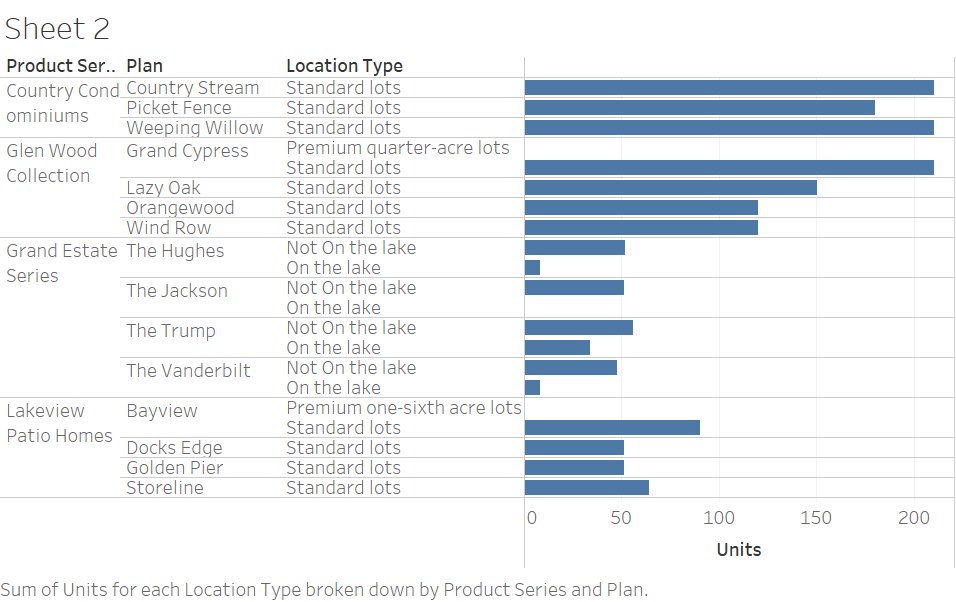
From the graph we can see that the number of Country Condominiums units sold is the highest among four series.

In [20]:
# Luxury Tax for Country Condominiums

import pandas as pd
import numpy as np

xA_value = (x1+x2+x3+x4+x5+x6+x7+x8).getValue()
xB_value = (x9+x10+x11+x12+x13).getValue()
xC_value = (x14+x15+x16+x17+x18).getValue()
xD_value = (x19+x20+x21).getValue()
# Create a dictionary to map variable names to their values
variable_values = {
    'xA': xA_value,
    'xB': xB_value,
    'xC': xC_value,
    'xD': xD_value
}

# Sort the variables by their values in descending order
sorted_variables = sorted(variable_values.items(), key=lambda item: item[1], reverse=True)

# Find the position 'i' of xD in the sorted list
i = [variable[0] for variable in sorted_variables].index('xD') + 1

# Print the position 'i'
print(f"The position 'i' of Country Condominiums units sold is: {i}")

The position 'i' of Country Condominiums units sold is: 2


### After check the position of the number of Country Condominiums units sold compared to the other three types, the number of Country Condominiums sold is still the second highest among all four types.

# Sensitivity Analysis

## 1. Change Objective Function Coefficients

In [22]:
#change 8 million to 80 million
m.setObjective(1.05*x22*0.22*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
               +1.03*x22*0.18*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
               +1.02*x22*0.2*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
               +1.03*x22*0.25*(220000*x19+160000*x20+140000*x21)
               -80000000*x22-Luxury_Tax, GRB.MAXIMIZE)
m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print ('obj:%g' % m.ObjVal)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 49 rows, 26 columns and 408 nonzeros
Model fingerprint: 0xcde78f77
Model has 21 quadratic objective terms
Variable types: 21 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e-01, 4e+05]
  Objective range  [5e+04, 8e+07]
  QObjective range [7e+04, 4e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+07]

MIP start from previous solve produced solution with objective 2.8688e+07 (0.00s)
Loaded MIP start from previous solve with objective 2.8688e+07

Presolve time: 0.00s
Presolved: 70 rows, 47 columns, 413 nonzeros
Variable types: 42 continuous, 5 integer (5 binary)

Root relaxation: cutoff, 36 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |    

### Report:
We can see the resule from above that the optimal solution for 8 million and 80 million are same, which means the Coef of x_22 in the objective functins are in the Region of Min and Max Obj Coef. and the reduced cost should be 0

## 2. Change Constraint Right-Hand Side Values

In [23]:
#change c7 to 10 acre
#Each outside parking space will occupy 200 square feet of space
m.addConstr ((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200<=10*43560, "c7")
# Set Objective
m.setObjective(1.05*x22*0.22*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
               +1.03*x22*0.18*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
               +1.02*x22*0.2*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
               +1.03*x22*0.25*(220000*x19+160000*x20+140000*x21)
               -8000000*x22-Luxury_Tax, GRB.MAXIMIZE)
m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print ('obj:%g' % m.ObjVal)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 50 rows, 26 columns and 426 nonzeros
Model fingerprint: 0x389fd4d2
Model has 21 quadratic objective terms
Variable types: 21 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e-01, 4e+05]
  Objective range  [5e+04, 8e+06]
  QObjective range [7e+04, 4e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+07]

MIP start from previous solve produced solution with objective 9.6503e+07 (0.00s)
Loaded MIP start from previous solve with objective 9.6503e+07

Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 70 rows, 47 columns, 413 nonzeros
Variable types: 42 continuous, 5 integer (5 binary)

Root relaxation: cutoff, 33 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Nod

In [24]:
#change c7 to 20 acre
m = gp.Model("CaseStudy2-Modified")

# Create Variables
x1 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x1") # Grand Estates-The Trump-On the lake
x2 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x2") # Grand Estates-The Trump-Not on the lake
x3 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x3") # Grand Estates-The Vanderbilt-On the lake
x4 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x4") # Grand Estates-The Vanderbilt-Not on the lake
x5 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x5") # Grand Estates-The Hughes-On the lake
x6 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x6") # Grand Estates-The Hughes-Not on the lake
x7 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x7") # Grand Estates-The Jackson-On the lake
x8 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x8") # Grand Estates-The Jackson-Not on the lake

x9 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x9") # Glen Wood Collection-Grand Cypress-On Premium
x10 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x10") # Glen Wood Collection-Grand Cypress-Standarded
x11 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x11") # Glen Wood Collection-Lazy Oak
x12 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x12") # Glen Wood Collection-Wind Row
x13 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x13") # Glen Wood Collection-Orangewood

x14 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x14") # Lakeview Patio Homes-Bayview-On Premium
x15 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x15") # Lakeview Patio Homes-Bayview-Standarded
x16 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x16") # Lakeview Patio Homes-Storeline
x17 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x17") # Lakeview Patio Homes-Docks Edge
x18 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x18") # Lakeview Patio Homes-Golden Pier

x19 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x19") # Country Condominiums-Country Stream
x20 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x20") # Country Condominiums-Weeping Willow
x21 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x21") # Country Condominiums-Picket Fence
# Set Constrains
# Modified 3: At least three of the Grand Estate series plan must have at least eight units on the lake.
x1_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x1_1") # Grand Estates-The Trump-On the lake-Whether>=8
x3_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x3_1") # Grand Estates-The Vanderbilt-On the lake-Whether>=8
x5_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x5_1") # Grand Estates-The Hughes-On the lake-Whether>=8
x7_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x7_1") # Grand Estates-The Jackson-On the lake-Whether>=8

m.addConstr (x1_1+x3_1+x5_1+x7_1>=3, "c0_1")

m.addConstr (x1>=8*x1_1, "c0")
m.addConstr (x3>=8*x3_1, "c1")
m.addConstr (x5>=8*x5_1, "c2")
m.addConstr (x7>=8*x7_1, "c3")

# 50 half-acre lots on the lake are to be used exclusively by the Grand Estate Series homes
m.addConstr (x1+x3+x5+x7==50, "c4")

# No more than 25% of the total Grand Cypress models and 25% of the total Bayview models may be built on the premium lots
m.addConstr (x9<=0.25*(x9+x10), "c5")
m.addConstr (x14<=0.25*(x14+x15), "c6")

#Each outside parking space will occupy 200 square feet of space
m.addConstr ((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200<=20*43560, "c7")
# Modified 1: Ignore the table of the Max and Min percentage
#Other Varieties:
# None of the four products is to make up more than 35% or less than 15% of the units built in the development
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c8")
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c9")

m.addConstr((x9+x10+x11+x12+x13)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c10")
m.addConstr((x9+x10+x11+x12+x13)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c11")

m.addConstr((x14+x15+x16+x17+x18)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c12")
m.addConstr((x14+x15+x16+x17+x18)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c13")

m.addConstr((x19+x20+x21)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c14")
m.addConstr((x19+x20+x21)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c15")

# Each plan must occupy between 20% and 35% of the total units of that products
m.addConstr((x1+x2)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c16")
m.addConstr((x1+x2)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c17")
m.addConstr((x3+x4)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c18")
m.addConstr((x3+x4)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c19")
m.addConstr((x5+x6)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c20")
m.addConstr((x5+x6)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c21")
m.addConstr((x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c22")
m.addConstr((x7+x8)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c23")

m.addConstr((x9+x10)<=0.35*(x9+x10+x11+x12+x13),"c24")
m.addConstr((x9+x10)>=0.2*(x9+x10+x11+x12+x13),"c25")
m.addConstr(x11<=0.35*(x9+x10+x11+x12+x13),"c26")
m.addConstr(x11>=0.2*(x9+x10+x11+x12+x13),"c27")
m.addConstr(x12<=0.35*(x9+x10+x11+x12+x13),"c28")
m.addConstr(x12>=0.2*(x9+x10+x11+x12+x13),"c29")
m.addConstr(x13<=0.35*(x9+x10+x11+x12+x13),"c30")
m.addConstr(x13>=0.2*(x9+x10+x11+x12+x13),"c31")

m.addConstr((x14+x15)<=0.35*(x14+x15+x16+x17+x18),"c32")
m.addConstr((x14+x15)>=0.2*(x14+x15+x16+x17+x18),"c33")
m.addConstr(x16<=0.35*(x14+x15+x16+x17+x18),"c34")
m.addConstr(x16>=0.2*(x14+x15+x16+x17+x18),"c35")
m.addConstr(x17<=0.35*(x14+x15+x16+x17+x18),"c36")
m.addConstr(x17>=0.2*(x14+x15+x16+x17+x18),"c37")
m.addConstr(x18<=0.35*(x14+x15+x16+x17+x18),"c38")
m.addConstr(x18>=0.2*(x14+x15+x16+x17+x18),"c39")

m.addConstr(x19<=0.35*(x19+x20+x21),"c40")
m.addConstr(x19>=0.2*(x19+x20+x21),"c41")
m.addConstr(x20<=0.35*(x19+x20+x21),"c42")
m.addConstr(x20>=0.2*(x19+x20+x21),"c43")
m.addConstr(x21<=0.35*(x19+x20+x21),"c44")
m.addConstr(x21>=0.2*(x19+x20+x21),"c45")

# No more than 70% of the single-family homes (all homes except the Country Condominiums) may be two-story homes
m.addConstr((x1+x2+x3+x4+x9+x10+x11+x12+x14+x15+x16)<=0.7*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18),"c46")
# Modified 2: Luxury Tax - From the begining, we could know that i=2

Luxury_Tax = 0.08*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
+0.08*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
+0.08*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
+0.02*2*(220000*x19+160000*x20+140000*x21)
# Modified 4: The LSDC can build a 10-acre sports/recreational complex on the property, this would reduce the usable land by 10 acres and cost $8 million to build
x22 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x22") # Wheather to build the sports/recreational or not
# Lotsize + Outside Parking + Road/Greenbelts <= 300 Acres
# Lotsize = Sum up half,1/4,1/6,1/10, and all others
# Lotsize = Ground + Yard + Garage
# Outside Parking = (2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200
# Road/Greenbelts = (x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000
m.addConstr(0.5*43560*(x1+x2+x3+x4+x5+x6+x7+x8)
            +0.25*43560*x9
            +4950*x10
            +0.1*43560*(x11+x12+x13+x15+x16+x17+x18)
            +(43560/6)*x14
            +1500*(x19+x20+x21)
            +((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200)
            +((x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000)<=((300*43560)-10*x22*43560),"c56")
# Set Objective
m.setObjective(1.05*x22*0.22*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
               +1.03*x22*0.18*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
               +1.02*x22*0.2*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
               +1.03*x22*0.25*(220000*x19+160000*x20+140000*x21)
               -8000000*x22-Luxury_Tax, GRB.MAXIMIZE)
m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print ('obj:%g' % m.ObjVal)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 49 rows, 26 columns and 408 nonzeros
Model fingerprint: 0x9a7da926
Model has 21 quadratic objective terms
Variable types: 21 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e-01, 4e+05]
  Objective range  [5e+04, 8e+06]
  QObjective range [7e+04, 4e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+07]
Presolve time: 0.00s
Presolved: 70 rows, 47 columns, 413 nonzeros
Variable types: 42 continuous, 5 integer (5 binary)
Found heuristic solution: objective 3400192.1429
Found heuristic solution: objective 1.006880e+08

Root relaxation: cutoff, 75 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbe

### Report:
We can see the resule from above that the optimal solution for 20 and 15 are same, which means 15 is already reach the upper bound of the (Constrain)feasible region.

In [25]:
#change c56 to 400 acre
m = gp.Model("CaseStudy2-Modified")

# Create Variables
x1 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x1") # Grand Estates-The Trump-On the lake
x2 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x2") # Grand Estates-The Trump-Not on the lake
x3 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x3") # Grand Estates-The Vanderbilt-On the lake
x4 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x4") # Grand Estates-The Vanderbilt-Not on the lake
x5 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x5") # Grand Estates-The Hughes-On the lake
x6 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x6") # Grand Estates-The Hughes-Not on the lake
x7 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x7") # Grand Estates-The Jackson-On the lake
x8 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x8") # Grand Estates-The Jackson-Not on the lake

x9 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x9") # Glen Wood Collection-Grand Cypress-On Premium
x10 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x10") # Glen Wood Collection-Grand Cypress-Standarded
x11 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x11") # Glen Wood Collection-Lazy Oak
x12 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x12") # Glen Wood Collection-Wind Row
x13 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x13") # Glen Wood Collection-Orangewood

x14 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x14") # Lakeview Patio Homes-Bayview-On Premium
x15 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x15") # Lakeview Patio Homes-Bayview-Standarded
x16 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x16") # Lakeview Patio Homes-Storeline
x17 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x17") # Lakeview Patio Homes-Docks Edge
x18 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x18") # Lakeview Patio Homes-Golden Pier

x19 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x19") # Country Condominiums-Country Stream
x20 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x20") # Country Condominiums-Weeping Willow
x21 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x21") # Country Condominiums-Picket Fence
# Set Constrains
# Modified 3: At least three of the Grand Estate series plan must have at least eight units on the lake.
x1_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x1_1") # Grand Estates-The Trump-On the lake-Whether>=8
x3_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x3_1") # Grand Estates-The Vanderbilt-On the lake-Whether>=8
x5_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x5_1") # Grand Estates-The Hughes-On the lake-Whether>=8
x7_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x7_1") # Grand Estates-The Jackson-On the lake-Whether>=8

m.addConstr (x1_1+x3_1+x5_1+x7_1>=3, "c0_1")

m.addConstr (x1>=8*x1_1, "c0")
m.addConstr (x3>=8*x3_1, "c1")
m.addConstr (x5>=8*x5_1, "c2")
m.addConstr (x7>=8*x7_1, "c3")

# 50 half-acre lots on the lake are to be used exclusively by the Grand Estate Series homes
m.addConstr (x1+x3+x5+x7==50, "c4")

# No more than 25% of the total Grand Cypress models and 25% of the total Bayview models may be built on the premium lots
m.addConstr (x9<=0.25*(x9+x10), "c5")
m.addConstr (x14<=0.25*(x14+x15), "c6")

#Each outside parking space will occupy 200 square feet of space
m.addConstr ((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200<=15*43560, "c7")
# Modified 1: Ignore the table of the Max and Min percentage
#Other Varieties:
# None of the four products is to make up more than 35% or less than 15% of the units built in the development
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c8")
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c9")

m.addConstr((x9+x10+x11+x12+x13)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c10")
m.addConstr((x9+x10+x11+x12+x13)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c11")

m.addConstr((x14+x15+x16+x17+x18)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c12")
m.addConstr((x14+x15+x16+x17+x18)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c13")

m.addConstr((x19+x20+x21)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c14")
m.addConstr((x19+x20+x21)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c15")

# Each plan must occupy between 20% and 35% of the total units of that products
m.addConstr((x1+x2)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c16")
m.addConstr((x1+x2)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c17")
m.addConstr((x3+x4)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c18")
m.addConstr((x3+x4)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c19")
m.addConstr((x5+x6)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c20")
m.addConstr((x5+x6)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c21")
m.addConstr((x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c22")
m.addConstr((x7+x8)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c23")

m.addConstr((x9+x10)<=0.35*(x9+x10+x11+x12+x13),"c24")
m.addConstr((x9+x10)>=0.2*(x9+x10+x11+x12+x13),"c25")
m.addConstr(x11<=0.35*(x9+x10+x11+x12+x13),"c26")
m.addConstr(x11>=0.2*(x9+x10+x11+x12+x13),"c27")
m.addConstr(x12<=0.35*(x9+x10+x11+x12+x13),"c28")
m.addConstr(x12>=0.2*(x9+x10+x11+x12+x13),"c29")
m.addConstr(x13<=0.35*(x9+x10+x11+x12+x13),"c30")
m.addConstr(x13>=0.2*(x9+x10+x11+x12+x13),"c31")

m.addConstr((x14+x15)<=0.35*(x14+x15+x16+x17+x18),"c32")
m.addConstr((x14+x15)>=0.2*(x14+x15+x16+x17+x18),"c33")
m.addConstr(x16<=0.35*(x14+x15+x16+x17+x18),"c34")
m.addConstr(x16>=0.2*(x14+x15+x16+x17+x18),"c35")
m.addConstr(x17<=0.35*(x14+x15+x16+x17+x18),"c36")
m.addConstr(x17>=0.2*(x14+x15+x16+x17+x18),"c37")
m.addConstr(x18<=0.35*(x14+x15+x16+x17+x18),"c38")
m.addConstr(x18>=0.2*(x14+x15+x16+x17+x18),"c39")

m.addConstr(x19<=0.35*(x19+x20+x21),"c40")
m.addConstr(x19>=0.2*(x19+x20+x21),"c41")
m.addConstr(x20<=0.35*(x19+x20+x21),"c42")
m.addConstr(x20>=0.2*(x19+x20+x21),"c43")
m.addConstr(x21<=0.35*(x19+x20+x21),"c44")
m.addConstr(x21>=0.2*(x19+x20+x21),"c45")

# No more than 70% of the single-family homes (all homes except the Country Condominiums) may be two-story homes
m.addConstr((x1+x2+x3+x4+x9+x10+x11+x12+x14+x15+x16)<=0.7*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18),"c46")
# Modified 2: Luxury Tax - From the begining, we could know that i=2

Luxury_Tax = 0.08*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
+0.08*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
+0.08*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
+0.02*2*(220000*x19+160000*x20+140000*x21)
# Modified 4: The LSDC can build a 10-acre sports/recreational complex on the property, this would reduce the usable land by 10 acres and cost $8 million to build
x22 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x22") # Wheather to build the sports/recreational or not
# Lotsize + Outside Parking + Road/Greenbelts <= 300 Acres
# Lotsize = Sum up half,1/4,1/6,1/10, and all others
# Lotsize = Ground + Yard + Garage
# Outside Parking = (2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200
# Road/Greenbelts = (x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000
m.addConstr(0.5*43560*(x1+x2+x3+x4+x5+x6+x7+x8)
            +0.25*43560*x9
            +4950*x10
            +0.1*43560*(x11+x12+x13+x15+x16+x17+x18)
            +(43560/6)*x14
            +1500*(x19+x20+x21)
            +((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200)
            +((x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000)<=((400*43560)-10*x22*43560),"c56")
# Set Objective
m.setObjective(1.05*x22*0.22*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
               +1.03*x22*0.18*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
               +1.02*x22*0.2*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
               +1.03*x22*0.25*(220000*x19+160000*x20+140000*x21)
               -8000000*x22-Luxury_Tax, GRB.MAXIMIZE)
m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print ('obj:%g' % m.ObjVal)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 49 rows, 26 columns and 408 nonzeros
Model fingerprint: 0x02d976ea
Model has 21 quadratic objective terms
Variable types: 21 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e-01, 4e+05]
  Objective range  [5e+04, 8e+06]
  QObjective range [7e+04, 4e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 2e+07]
Presolve time: 0.00s
Presolved: 70 rows, 47 columns, 413 nonzeros
Variable types: 42 continuous, 5 integer (5 binary)
Found heuristic solution: objective 3400192.1429
Found heuristic solution: objective 1.345025e+08

Root relaxation: cutoff, 66 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbe

### Report：
We can see that the value of $x_2$ in optimal solution decreases and $x_4$ increase...because of the changing in $c_{56}$ to 400 arces

## 3. Change Variabe Bounds

In [26]:
#add upper bound for x10,which is 200

m = gp.Model("CaseStudy2-Modified")

# Create Variables
x1 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x1") # Grand Estates-The Trump-On the lake
x2 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x2") # Grand Estates-The Trump-Not on the lake
x3 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x3") # Grand Estates-The Vanderbilt-On the lake
x4 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x4") # Grand Estates-The Vanderbilt-Not on the lake
x5 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x5") # Grand Estates-The Hughes-On the lake
x6 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x6") # Grand Estates-The Hughes-Not on the lake
x7 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x7") # Grand Estates-The Jackson-On the lake
x8 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x8") # Grand Estates-The Jackson-Not on the lake

x9 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x9") # Glen Wood Collection-Grand Cypress-On Premium
x10 = m.addVar(lb = 0.0,ub=200, vtype = GRB.CONTINUOUS, name = "x10") # Glen Wood Collection-Grand Cypress-Standarded
x11 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x11") # Glen Wood Collection-Lazy Oak
x12 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x12") # Glen Wood Collection-Wind Row
x13 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x13") # Glen Wood Collection-Orangewood

x14 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x14") # Lakeview Patio Homes-Bayview-On Premium
x15 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x15") # Lakeview Patio Homes-Bayview-Standarded
x16 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x16") # Lakeview Patio Homes-Storeline
x17 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x17") # Lakeview Patio Homes-Docks Edge
x18 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x18") # Lakeview Patio Homes-Golden Pier

x19 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x19") # Country Condominiums-Country Stream
x20 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x20") # Country Condominiums-Weeping Willow
x21 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x21") # Country Condominiums-Picket Fence
# Set Constrains
# Modified 3: At least three of the Grand Estate series plan must have at least eight units on the lake.
x1_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x1_1") # Grand Estates-The Trump-On the lake-Whether>=8
x3_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x3_1") # Grand Estates-The Vanderbilt-On the lake-Whether>=8
x5_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x5_1") # Grand Estates-The Hughes-On the lake-Whether>=8
x7_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x7_1") # Grand Estates-The Jackson-On the lake-Whether>=8

m.addConstr (x1_1+x3_1+x5_1+x7_1>=3, "c0_1")

m.addConstr (x1>=8*x1_1, "c0")
m.addConstr (x3>=8*x3_1, "c1")
m.addConstr (x5>=8*x5_1, "c2")
m.addConstr (x7>=8*x7_1, "c3")

# 50 half-acre lots on the lake are to be used exclusively by the Grand Estate Series homes
m.addConstr (x1+x3+x5+x7==50, "c4")

# No more than 25% of the total Grand Cypress models and 25% of the total Bayview models may be built on the premium lots
m.addConstr (x9<=0.25*(x9+x10), "c5")
m.addConstr (x14<=0.25*(x14+x15), "c6")

#Each outside parking space will occupy 200 square feet of space
m.addConstr ((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200<=15*43560, "c7")
# Modified 1: Ignore the table of the Max and Min percentage
#Other Varieties:
# None of the four products is to make up more than 35% or less than 15% of the units built in the development
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c8")
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c9")

m.addConstr((x9+x10+x11+x12+x13)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c10")
m.addConstr((x9+x10+x11+x12+x13)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c11")

m.addConstr((x14+x15+x16+x17+x18)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c12")
m.addConstr((x14+x15+x16+x17+x18)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c13")

m.addConstr((x19+x20+x21)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c14")
m.addConstr((x19+x20+x21)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c15")

# Each plan must occupy between 20% and 35% of the total units of that products
m.addConstr((x1+x2)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c16")
m.addConstr((x1+x2)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c17")
m.addConstr((x3+x4)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c18")
m.addConstr((x3+x4)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c19")
m.addConstr((x5+x6)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c20")
m.addConstr((x5+x6)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c21")
m.addConstr((x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c22")
m.addConstr((x7+x8)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c23")

m.addConstr((x9+x10)<=0.35*(x9+x10+x11+x12+x13),"c24")
m.addConstr((x9+x10)>=0.2*(x9+x10+x11+x12+x13),"c25")
m.addConstr(x11<=0.35*(x9+x10+x11+x12+x13),"c26")
m.addConstr(x11>=0.2*(x9+x10+x11+x12+x13),"c27")
m.addConstr(x12<=0.35*(x9+x10+x11+x12+x13),"c28")
m.addConstr(x12>=0.2*(x9+x10+x11+x12+x13),"c29")
m.addConstr(x13<=0.35*(x9+x10+x11+x12+x13),"c30")
m.addConstr(x13>=0.2*(x9+x10+x11+x12+x13),"c31")

m.addConstr((x14+x15)<=0.35*(x14+x15+x16+x17+x18),"c32")
m.addConstr((x14+x15)>=0.2*(x14+x15+x16+x17+x18),"c33")
m.addConstr(x16<=0.35*(x14+x15+x16+x17+x18),"c34")
m.addConstr(x16>=0.2*(x14+x15+x16+x17+x18),"c35")
m.addConstr(x17<=0.35*(x14+x15+x16+x17+x18),"c36")
m.addConstr(x17>=0.2*(x14+x15+x16+x17+x18),"c37")
m.addConstr(x18<=0.35*(x14+x15+x16+x17+x18),"c38")
m.addConstr(x18>=0.2*(x14+x15+x16+x17+x18),"c39")

m.addConstr(x19<=0.35*(x19+x20+x21),"c40")
m.addConstr(x19>=0.2*(x19+x20+x21),"c41")
m.addConstr(x20<=0.35*(x19+x20+x21),"c42")
m.addConstr(x20>=0.2*(x19+x20+x21),"c43")
m.addConstr(x21<=0.35*(x19+x20+x21),"c44")
m.addConstr(x21>=0.2*(x19+x20+x21),"c45")

# No more than 70% of the single-family homes (all homes except the Country Condominiums) may be two-story homes
m.addConstr((x1+x2+x3+x4+x9+x10+x11+x12+x14+x15+x16)<=0.7*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18),"c46")
# Modified 2: Luxury Tax - From the begining, we could know that i=2

Luxury_Tax = 0.08*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
+0.08*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
+0.08*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
+0.02*2*(220000*x19+160000*x20+140000*x21)
# Modified 4: The LSDC can build a 10-acre sports/recreational complex on the property, this would reduce the usable land by 10 acres and cost $8 million to build
x22 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x22") # Wheather to build the sports/recreational or not
# Lotsize + Outside Parking + Road/Greenbelts <= 300 Acres
# Lotsize = Sum up half,1/4,1/6,1/10, and all others
# Lotsize = Ground + Yard + Garage
# Outside Parking = (2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200
# Road/Greenbelts = (x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000
m.addConstr(0.5*43560*(x1+x2+x3+x4+x5+x6+x7+x8)
            +0.25*43560*x9
            +4950*x10
            +0.1*43560*(x11+x12+x13+x15+x16+x17+x18)
            +(43560/6)*x14
            +1500*(x19+x20+x21)
            +((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200)
            +((x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000)<=((300*43560)-10*x22*43560),"c56")
# Set Objective
m.setObjective(1.05*x22*0.22*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
               +1.03*x22*0.18*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
               +1.02*x22*0.2*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
               +1.03*x22*0.25*(220000*x19+160000*x20+140000*x21)
               -8000000*x22-Luxury_Tax, GRB.MAXIMIZE)
m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print ('obj:%g' % m.ObjVal)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 49 rows, 26 columns and 408 nonzeros
Model fingerprint: 0x4a0e6b49
Model has 21 quadratic objective terms
Variable types: 21 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e-01, 4e+05]
  Objective range  [5e+04, 8e+06]
  QObjective range [7e+04, 4e+05]
  Bounds range     [1e+00, 2e+02]
  RHS range        [3e+00, 1e+07]
Presolve time: 0.00s
Presolved: 70 rows, 47 columns, 413 nonzeros
Variable types: 42 continuous, 5 integer (5 binary)
Found heuristic solution: objective 3424029.2857
Found heuristic solution: objective 1.006463e+08

Root relaxation: cutoff, 72 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbe

In [27]:
#add lower bound for x8,which is 50

m = gp.Model("CaseStudy2-Modified")

# Create Variables
x1 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x1") # Grand Estates-The Trump-On the lake
x2 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x2") # Grand Estates-The Trump-Not on the lake
x3 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x3") # Grand Estates-The Vanderbilt-On the lake
x4 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x4") # Grand Estates-The Vanderbilt-Not on the lake
x5 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x5") # Grand Estates-The Hughes-On the lake
x6 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x6") # Grand Estates-The Hughes-Not on the lake
x7 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x7") # Grand Estates-The Jackson-On the lake
x8 = m.addVar(lb = 50.0, vtype = GRB.CONTINUOUS, name = "x8") # Grand Estates-The Jackson-Not on the lake

x9 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x9") # Glen Wood Collection-Grand Cypress-On Premium
x10 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x10") # Glen Wood Collection-Grand Cypress-Standarded
x11 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x11") # Glen Wood Collection-Lazy Oak
x12 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x12") # Glen Wood Collection-Wind Row
x13 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x13") # Glen Wood Collection-Orangewood

x14 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x14") # Lakeview Patio Homes-Bayview-On Premium
x15 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x15") # Lakeview Patio Homes-Bayview-Standarded
x16 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x16") # Lakeview Patio Homes-Storeline
x17 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x17") # Lakeview Patio Homes-Docks Edge
x18 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x18") # Lakeview Patio Homes-Golden Pier

x19 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x19") # Country Condominiums-Country Stream
x20 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x20") # Country Condominiums-Weeping Willow
x21 = m.addVar(lb = 0.0, vtype = GRB.CONTINUOUS, name = "x21") # Country Condominiums-Picket Fence
# Set Constrains
# Modified 3: At least three of the Grand Estate series plan must have at least eight units on the lake.
x1_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x1_1") # Grand Estates-The Trump-On the lake-Whether>=8
x3_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x3_1") # Grand Estates-The Vanderbilt-On the lake-Whether>=8
x5_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x5_1") # Grand Estates-The Hughes-On the lake-Whether>=8
x7_1 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x7_1") # Grand Estates-The Jackson-On the lake-Whether>=8

m.addConstr (x1_1+x3_1+x5_1+x7_1>=3, "c0_1")

m.addConstr (x1>=8*x1_1, "c0")
m.addConstr (x3>=8*x3_1, "c1")
m.addConstr (x5>=8*x5_1, "c2")
m.addConstr (x7>=8*x7_1, "c3")

# 50 half-acre lots on the lake are to be used exclusively by the Grand Estate Series homes
m.addConstr (x1+x3+x5+x7==50, "c4")

# No more than 25% of the total Grand Cypress models and 25% of the total Bayview models may be built on the premium lots
m.addConstr (x9<=0.25*(x9+x10), "c5")
m.addConstr (x14<=0.25*(x14+x15), "c6")

#Each outside parking space will occupy 200 square feet of space
m.addConstr ((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200<=15*43560, "c7")
# Modified 1: Ignore the table of the Max and Min percentage
#Other Varieties:
# None of the four products is to make up more than 35% or less than 15% of the units built in the development
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c8")
m.addConstr((x1+x2+x3+x4+x5+x6+x7+x8)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c9")

m.addConstr((x9+x10+x11+x12+x13)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c10")
m.addConstr((x9+x10+x11+x12+x13)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c11")

m.addConstr((x14+x15+x16+x17+x18)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c12")
m.addConstr((x14+x15+x16+x17+x18)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c13")

m.addConstr((x19+x20+x21)>=0.15*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c14")
m.addConstr((x19+x20+x21)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21),"c15")

# Each plan must occupy between 20% and 35% of the total units of that products
m.addConstr((x1+x2)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c16")
m.addConstr((x1+x2)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c17")
m.addConstr((x3+x4)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c18")
m.addConstr((x3+x4)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c19")
m.addConstr((x5+x6)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c20")
m.addConstr((x5+x6)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c21")
m.addConstr((x7+x8)<=0.35*(x1+x2+x3+x4+x5+x6+x7+x8),"c22")
m.addConstr((x7+x8)>=0.2*(x1+x2+x3+x4+x5+x6+x7+x8),"c23")

m.addConstr((x9+x10)<=0.35*(x9+x10+x11+x12+x13),"c24")
m.addConstr((x9+x10)>=0.2*(x9+x10+x11+x12+x13),"c25")
m.addConstr(x11<=0.35*(x9+x10+x11+x12+x13),"c26")
m.addConstr(x11>=0.2*(x9+x10+x11+x12+x13),"c27")
m.addConstr(x12<=0.35*(x9+x10+x11+x12+x13),"c28")
m.addConstr(x12>=0.2*(x9+x10+x11+x12+x13),"c29")
m.addConstr(x13<=0.35*(x9+x10+x11+x12+x13),"c30")
m.addConstr(x13>=0.2*(x9+x10+x11+x12+x13),"c31")

m.addConstr((x14+x15)<=0.35*(x14+x15+x16+x17+x18),"c32")
m.addConstr((x14+x15)>=0.2*(x14+x15+x16+x17+x18),"c33")
m.addConstr(x16<=0.35*(x14+x15+x16+x17+x18),"c34")
m.addConstr(x16>=0.2*(x14+x15+x16+x17+x18),"c35")
m.addConstr(x17<=0.35*(x14+x15+x16+x17+x18),"c36")
m.addConstr(x17>=0.2*(x14+x15+x16+x17+x18),"c37")
m.addConstr(x18<=0.35*(x14+x15+x16+x17+x18),"c38")
m.addConstr(x18>=0.2*(x14+x15+x16+x17+x18),"c39")

m.addConstr(x19<=0.35*(x19+x20+x21),"c40")
m.addConstr(x19>=0.2*(x19+x20+x21),"c41")
m.addConstr(x20<=0.35*(x19+x20+x21),"c42")
m.addConstr(x20>=0.2*(x19+x20+x21),"c43")
m.addConstr(x21<=0.35*(x19+x20+x21),"c44")
m.addConstr(x21>=0.2*(x19+x20+x21),"c45")

# No more than 70% of the single-family homes (all homes except the Country Condominiums) may be two-story homes
m.addConstr((x1+x2+x3+x4+x9+x10+x11+x12+x14+x15+x16)<=0.7*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18),"c46")
# Modified 2: Luxury Tax - From the begining, we could know that i=2

Luxury_Tax = 0.08*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
+0.08*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
+0.08*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
+0.02*2*(220000*x19+160000*x20+140000*x21)
# Modified 4: The LSDC can build a 10-acre sports/recreational complex on the property, this would reduce the usable land by 10 acres and cost $8 million to build
x22 = m.addVar(lb = 0.0, vtype = GRB.BINARY, name = "x22") # Wheather to build the sports/recreational or not
# Lotsize + Outside Parking + Road/Greenbelts <= 300 Acres
# Lotsize = Sum up half,1/4,1/6,1/10, and all others
# Lotsize = Ground + Yard + Garage
# Outside Parking = (2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200
# Road/Greenbelts = (x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000
m.addConstr(0.5*43560*(x1+x2+x3+x4+x5+x6+x7+x8)
            +0.25*43560*x9
            +4950*x10
            +0.1*43560*(x11+x12+x13+x15+x16+x17+x18)
            +(43560/6)*x14
            +1500*(x19+x20+x21)
            +((2*(x1+x2+x11+x14+x15+x20+x21) + 3*x19 + (x3+x4+x5+x6+x9+x10+x12+x13+x16+x17))*200)
            +((x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21)*1000)<=((300*43560)-10*x22*43560),"c56")
# Set Objective
m.setObjective(1.05*x22*0.22*(960000*x1+700000*x2+934000*x3+680000*x4+895000*x5+650000*x6+817000*x7+590000*x8)
               +1.03*x22*0.18*(460000*x9+420000*x10+380000*x11+320000*x12+280000*x13)
               +1.02*x22*0.2*(330000*x14+300000*x15+270000*x16+240000*x17+200000*x18)
               +1.03*x22*0.25*(220000*x19+160000*x20+140000*x21)
               -8000000*x22-Luxury_Tax, GRB.MAXIMIZE)
m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print ('obj:%g' % m.ObjVal)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 49 rows, 26 columns and 408 nonzeros
Model fingerprint: 0x4501f2bd
Model has 21 quadratic objective terms
Variable types: 21 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e-01, 4e+05]
  Objective range  [5e+04, 8e+06]
  QObjective range [7e+04, 4e+05]
  Bounds range     [1e+00, 5e+01]
  RHS range        [3e+00, 1e+07]
Presolve time: 0.00s
Presolved: 70 rows, 47 columns, 413 nonzeros
Variable types: 42 continuous, 5 integer (5 binary)
Found heuristic solution: objective 2.571697e+07
Found heuristic solution: objective 1.006880e+08

Root relaxation: cutoff, 65 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbe

### Report:
We can see that changing the interval of values of the variables does not change the optimal solution, so it can be shown that the value of the original optimal solution is the one that falls within the range of values specified later.
- If increasing the upper bound of $x_{10_1}$ does not affect the optimal solution or the objective function value, it implies that the current optimal solution is not constrained by the upper bound of $x_{10_1}$. This means that $x_{10_1}$ is not at its upper bound in the optimal solution; there is slack in the constraint associated with $x_{10_1}$, so the constraint is non-binding. The solution is within the feasible range and increasing the upper bound further does not open up any better solutions that can improve the objective.
- Similarly, The constraint associated with $x_{8_1}$'s lower bound is not active in the optimal solution. This means that the solution for $x_{8_1}$ is above its lower bound and the resources or capacities associated with $x_{8_1}$ are not fully utilized. The constraint is redundant in the current solution. The current optimal value of $x_{8_1}$ lies above the original lower bound and also any increased lower bounds that have been tested. This implies that the solution space for $x_{8_1}$ is to some extent flexible without impacting the optimality.
- As described, both $x_{10_1}$ and $x_{8_1}$ are part of non-binding constraints. This is useful to know because it suggests that under current conditions, there are other constraints in the model which are more critical and are determining the optimal solution.